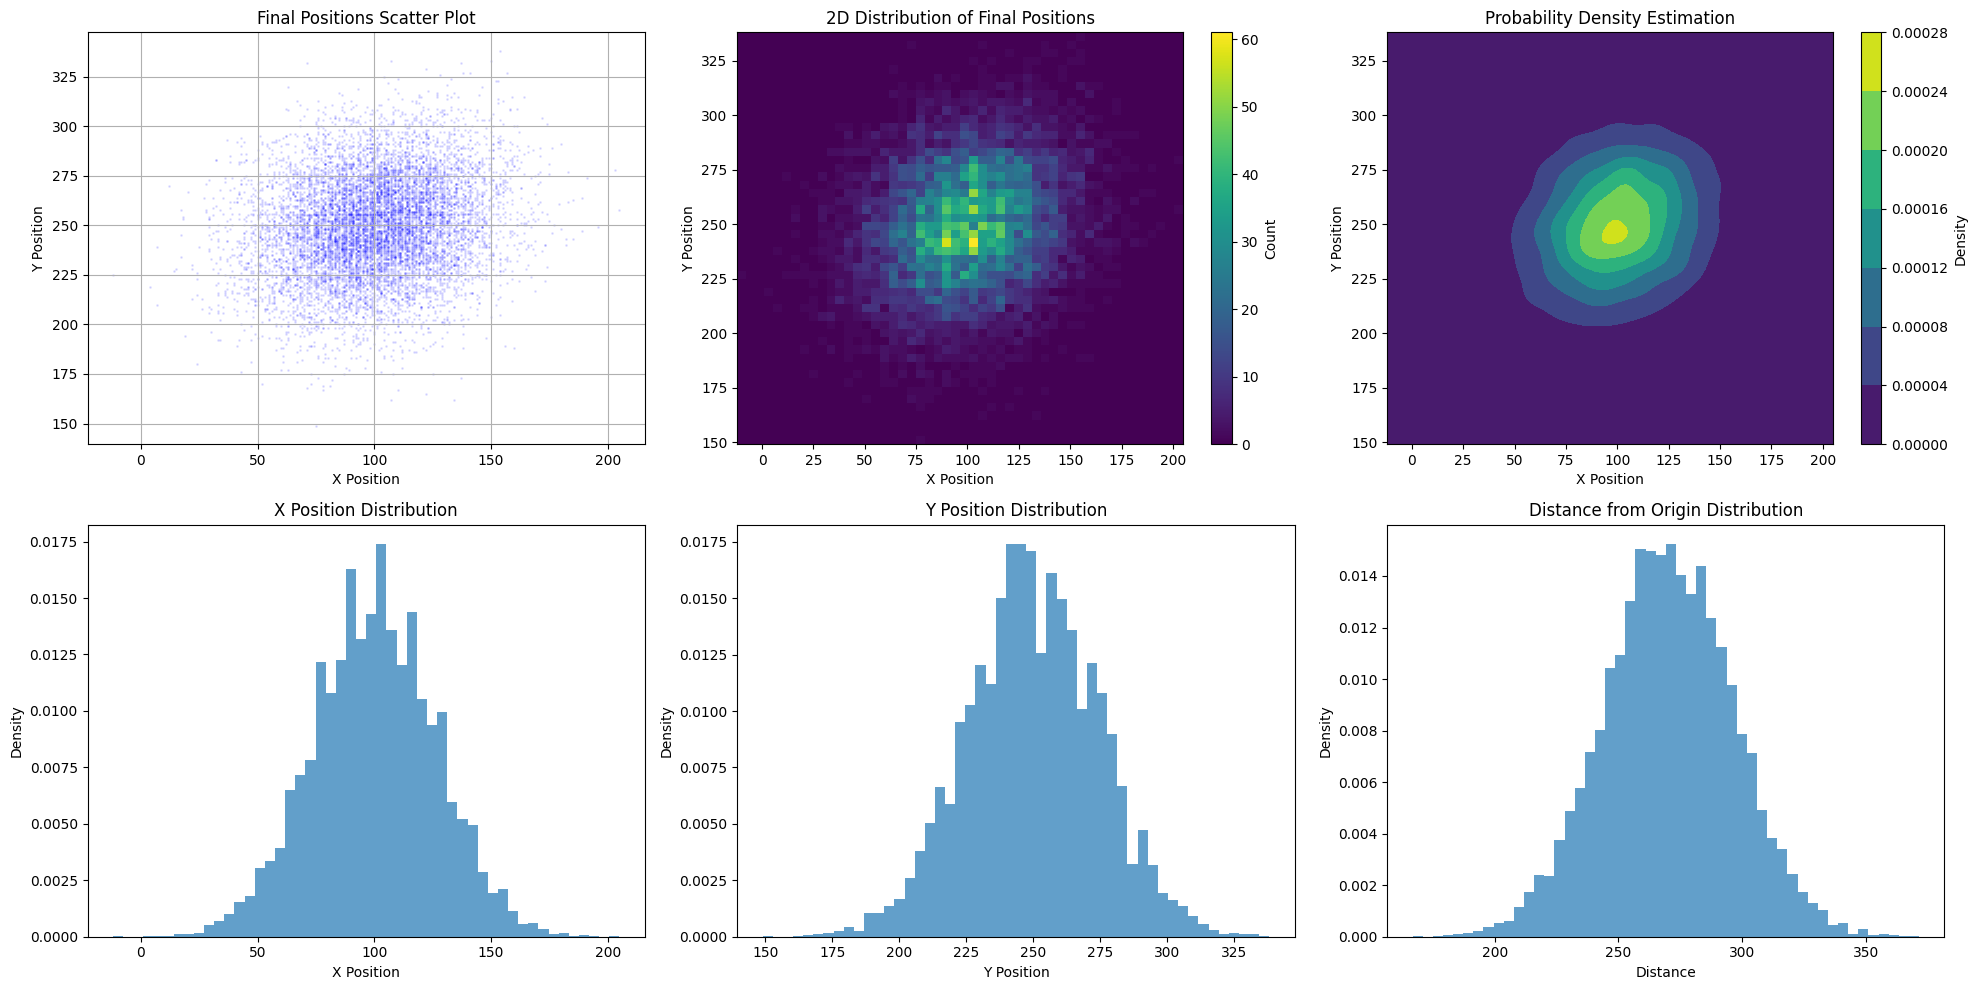

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def random_walk_2d(n_steps, n_walks=1000, probabilities=None):
    """
    Simulate 2D random walk with different probabilities for each direction

    Parameters:
    n_steps: number of steps in each walk
    n_walks: number of different walks to simulate
    probabilities: list of probabilities for each direction

    Returns:
    numpy array of final positions for each walk
    """
    # Define possible movement directions (8 directions)
    directions = [
        (0, 1),   # North
        (1, 1),   # Northeast
        (1, 0),   # East
        (1, -1),  # Southeast
        (0, -1),  # South
        (-1, -1), # Southwest
        (-1, 0),  # West
        (-1, 1)   # Northwest
    ]

    final_positions = np.zeros((n_walks, 2))

    for walk in range(n_walks):
        x = 0
        y = 0
        for _ in range(n_steps):
            direction = np.random.choice(len(directions), p=probabilities)
            dx, dy = directions[direction]
            x += dx
            y += dy
        final_positions[walk] = [x, y]

    return final_positions

def plot_walks_analysis(positions):
    """
    Analyze and visualize the results with multiple plots

    Parameters:
    positions: numpy array of final positions from random walks
    """
    plt.figure(figsize=(20, 10))

    # Plot 1: Scatter plot of final positions
    plt.subplot(231)
    plt.scatter(positions[:, 0], positions[:, 1], alpha=0.1, s=1, c='blue')
    plt.title('Final Positions Scatter Plot')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)

    # Plot 2: 2D histogram
    plt.subplot(232)
    plt.hist2d(positions[:, 0], positions[:, 1], bins=50, cmap='viridis')
    plt.colorbar(label='Count')
    plt.title('2D Distribution of Final Positions')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')

    # Plot 3: Kernel density estimation
    plt.subplot(233)
    xmin, xmax = positions[:, 0].min(), positions[:, 0].max()
    ymin, ymax = positions[:, 1].min(), positions[:, 1].max()
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions_kernel = np.vstack([X.ravel(), Y.ravel()])
    values = positions.T
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions_kernel).T, X.shape)
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.colorbar(label='Density')
    plt.title('Probability Density Estimation')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')

    # Plot 4: X distribution histogram
    plt.subplot(234)
    plt.hist(positions[:, 0], bins=50, density=True, alpha=0.7)
    plt.title('X Position Distribution')
    plt.xlabel('X Position')
    plt.ylabel('Density')

    # Plot 5: Y distribution histogram
    plt.subplot(235)
    plt.hist(positions[:, 1], bins=50, density=True, alpha=0.7)
    plt.title('Y Position Distribution')
    plt.xlabel('Y Position')
    plt.ylabel('Density')

    # Plot 6: Distance from origin distribution
    plt.subplot(236)
    distances = np.sqrt(np.sum(positions**2, axis=1))
    plt.hist(distances, bins=50, density=True, alpha=0.7)
    plt.title('Distance from Origin Distribution')
    plt.xlabel('Distance')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

    # Display statistical summary
    print('\nStatistical Summary:')
    print(f'Mean X position: {np.mean(positions[:, 0]):.2f}')
    print(f'Mean Y position: {np.mean(positions[:, 1]):.2f}')
    print(f'Standard deviation X: {np.std(positions[:, 0]):.2f}')
    print(f'Standard deviation Y: {np.std(positions[:, 1]):.2f}')
    print(f'Mean distance from origin: {np.mean(distances):.2f}')
    print(f'Maximum distance from origin: {np.max(distances):.2f}')

# Define asymmetric probabilities for different directions
probabilities = [
    0.25,   # North (highest probability)
    0.15,   # Northeast
    0.20,   # East
    0.05,   # Southeast
    0.05,   # South
    0.10,   # Southwest
    0.15,   # West
    0.05    # Northwest
]

# Verify that probabilities sum to 1
assert np.isclose(sum(probabilities), 1.0), "Probabilities must sum to 1"

# Run simulation
n_steps = 1000   # Number of steps per walk
n_walks = 10000  # Number of walks to simulate
final_positions = random_walk_2d(n_steps, n_walks, probabilities)

# Plot results and display statistics
plot_walks_analysis(final_positions)